# import libraries

In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading stock price data

In [9]:
data = pd.read_csv('ADANIPORTS.csv') 

In [10]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


# Preparing the data

In [12]:
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Spliting data into training and testing sets

In [13]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Function to create LSTM dataset

In [15]:
def create_lstm_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i + time_steps, 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# time steps for the LSTM

In [16]:
time_steps = 60 


# Creating dataset


In [17]:
X_train, y_train = create_lstm_dataset(train_data, time_steps)
X_test, y_test = create_lstm_dataset(test_data, time_steps)

# Reshaping the data for input

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model

In [19]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train

In [21]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
82/82 [==============================] - 4s 22ms/step - loss: 0.0051
Epoch 2/10
82/82 [==============================] - 2s 22ms/step - loss: 9.9496e-04
Epoch 3/10
82/82 [==============================] - 2s 21ms/step - loss: 8.8076e-04
Epoch 4/10
82/82 [==============================] - 2s 21ms/step - loss: 8.0392e-04
Epoch 5/10
82/82 [==============================] - 2s 21ms/step - loss: 7.5434e-04
Epoch 6/10
82/82 [==============================] - 2s 21ms/step - loss: 6.8618e-04
Epoch 7/10
82/82 [==============================] - 2s 21ms/step - loss: 6.3886e-04
Epoch 8/10
82/82 [==============================] - 2s 22ms/step - loss: 5.7882e-04
Epoch 9/10
82/82 [==============================] - 2s 22ms/step - loss: 5.4693e-04
Epoch 10/10
82/82 [==============================] - 2s 23ms/step - loss: 5.1982e-04


# Making Predictions

In [22]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

19/19 [==============================] - 0s 7ms/step


In [23]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Ploting actual and predicted price

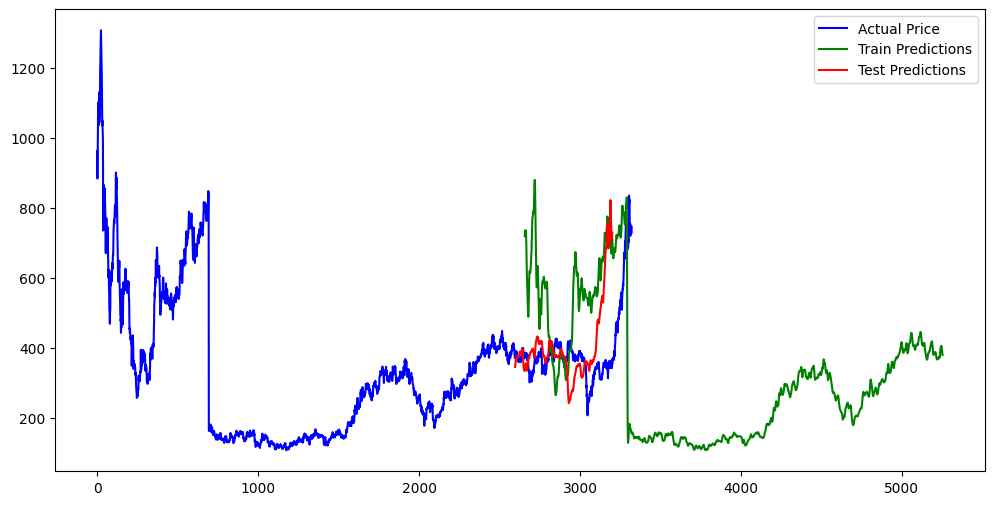

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(close_prices, color='blue', label='Actual Price')
plt.plot([None]*train_size + [x[0] for x in train_predictions], color='green', label='Train Predictions')
plt.plot([None]*len(train_predictions) + [x[0] for x in test_predictions], color='red', label='Test Predictions')
plt.legend()
plt.show()